# 1. Holt-Winter ETS model - Detailed

### We are here testing the Holt-WInter ETS model on the whole day. RMSE of forecast vs backtest will help assess the model right

## I. Declarations

In [125]:
# Library Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import timeit

from statsmodels.tsa.api import ExponentialSmoothing
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings


## II. Model pipe

## III. Exploring the output

## V. Analysis of the model 

### A. Analysis of the Distribution

In [153]:
df_rmse = pd.read_csv("/home/exalis/GitHub/velib-prediction/velib-prediction/6. Model Assessement/6 . Consolidation of the results.csv", decimal=",")

#### 1. Outliers

In [154]:
df_rmse.index = df_rmse.hour
df_rmse.pop("hour")

hour
01:00:00    01:00:00
01:15:00    01:15:00
01:30:00    01:30:00
01:45:00    01:45:00
02:00:00    02:00:00
              ...   
22:15:00    22:15:00
22:30:00    22:30:00
22:45:00    22:45:00
23:00:00    23:00:00
23:15:00    23:15:00
Name: hour, Length: 90, dtype: object

In [155]:
df_rmse

,ETS RMSE F vs B,SARIMAX RMSE F vs B,XGBoost RMSE F vs B,LSTM multistep F vs B
hour,,,,
01:00:00,0.00,0.39,0.83,0.12
01:15:00,0.00,0.32,0.38,0.12
01:30:00,0.00,0.04,0.47,0.12
01:45:00,0.00,0.12,0.23,0.12
02:00:00,0.00,0.12,0.19,0.12
...,...,...,...,...
22:15:00,1.32,0.49,0.58,0.37
22:30:00,0.42,0.31,0.81,0.12
22:45:00,0.25,0.67,0.52,0.27


In [156]:
df_rmse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 01:00:00 to 23:15:00
Data columns (total 4 columns):
ETS RMSE F vs B          90 non-null float64
SARIMAX RMSE F vs B      90 non-null float64
XGBoost RMSE F vs B      90 non-null float64
LSTM multistep F vs B    90 non-null float64
dtypes: float64(4)
memory usage: 6.0+ KB


In [157]:
df_rmse.describe()

,ETS RMSE F vs B,SARIMAX RMSE F vs B,XGBoost RMSE F vs B,LSTM multistep F vs B
count,90.000000,90.000000,90.000000,90.000000
mean,1.638667,2.695111,1.857778,1.397556
std,1.961805,5.948815,2.157247,1.577858
min,0.000000,0.000000,0.090000,0.120000
25%,0.142500,0.345000,0.477500,0.120000
50%,1.000000,1.400000,1.140000,0.985000
75%,2.390000,2.620000,2.190000,1.777500
max,9.520000,53.030000,10.400000,9.120000


In [158]:
col = df_rmse.columns
col

Index(['ETS RMSE F vs B', 'SARIMAX RMSE F vs B', 'XGBoost RMSE F vs B',
       'LSTM multistep F vs B'],
      dtype='object')

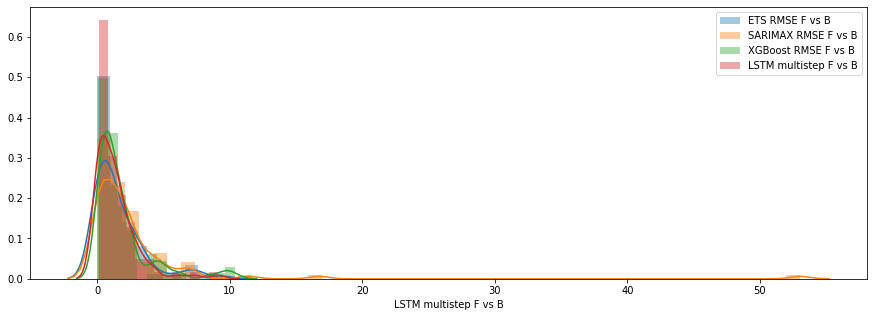

In [159]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df_rmse[col[0]],label=col[0])
ax = sns.distplot(df_rmse[col[1]],label=col[1])
ax = sns.distplot(df_rmse[col[2]],label=col[2])
ax = sns.distplot(df_rmse[col[3]],label=col[3])

plt.legend()
plt.show()

In [160]:
for i in range(0, len(col)):
    print("Number of values > 4 in ", col[i],":",df_rmse[df_rmse[col[i]]>4].count()[0])

Number of values > 4 in  ETS RMSE F vs B : 8
Number of values > 4 in  SARIMAX RMSE F vs B : 14
Number of values > 4 in  XGBoost RMSE F vs B : 12
Number of values > 4 in  LSTM multistep F vs B : 5


#### 2. Zero Values

In [161]:
for i in range(0, len(col)):
    print("Number of values == 0 in ", col[i],":",df_rmse[df_rmse[col[i]]==0].count()[0])

Number of values == 0 in  ETS RMSE F vs B : 21
Number of values == 0 in  SARIMAX RMSE F vs B : 1
Number of values == 0 in  XGBoost RMSE F vs B : 0
Number of values == 0 in  LSTM multistep F vs B : 0


There are 19 values at zero, and it is before 6:15. The station has no activity! We must remove them in order not to improve the global RMSE

### B. Analysis of the outliers

For 10:00 and 13h15/13h30, RMSE is important due to the van coming to take away some bikes. This is an unexpected event and does not reflect an efficiency in the algorithm.

In [162]:
i = 35
model_generation_viz(df_result.hour[i], 30, df_result.best_parameters[i])
print(i+1,"/",len(time_list)+1)
print("Best parameters:",df_result.best_parameters[i])
print("RMSE:",df_result.rmse_f_b[i])
print()
print()

NameError: name 'model_generation_viz' is not defined

Here comes the van

In [163]:
i = 49
model_generation_viz(df_result.hour[i], 30, df_result.best_parameters[i])
print(i+1,"/",len(time_list)+1)
print("Best parameters:",df_result.best_parameters[i])
print("RMSE:",df_result.rmse_f_b[i])
print()
print()

NameError: name 'model_generation_viz' is not defined

Here comes the van

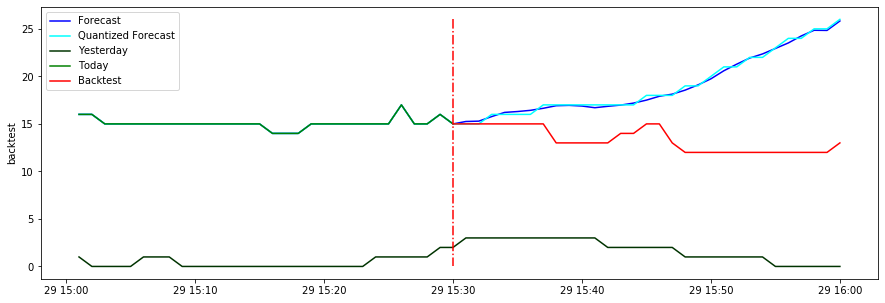

58 / 97
Best parameters: ['add', False, 'add', 60, False, False]
RMSE: 7.209517025008726




In [194]:
i = 57
model_generation_viz(df_result.hour[i], 30, df_result.best_parameters[i])
print(i+1,"/",len(time_list)+1)
print("Best parameters:",df_result.best_parameters[i])
print("RMSE:",df_result.rmse_f_b[i])
print()
print()

Here, the model is just inefficient!

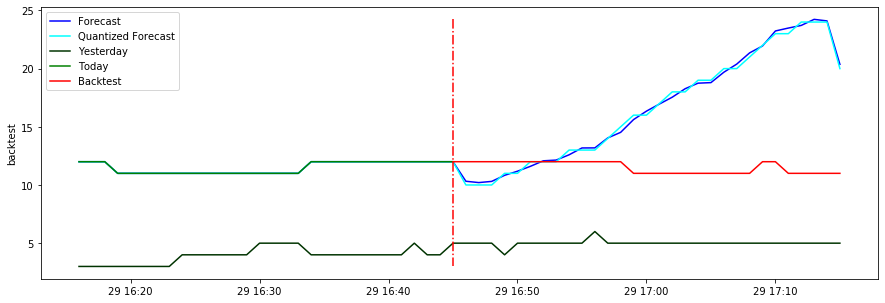

63 / 97
Best parameters: ['mul', False, 'mul', 60, True, False]
RMSE: 7.243780332022765




In [196]:
i = 62
model_generation_viz(df_result.hour[i], 30, df_result.best_parameters[i])
print(i+1,"/",len(time_list)+1)
print("Best parameters:",df_result.best_parameters[i])
print("RMSE:",df_result.rmse_f_b[i])
print()
print()

Here, the model is just inefficient too!


#### C. Final Assessement, with filter on the results

Here, we will remove 0 values and 10:00:00, 13:15:00 and 13:30:00 values

In [164]:
# Removing "0" values from first column
df_rmse = df_rmse[df_rmse[col[0]] > 0]

In [165]:
df_rmse = df_rmse[(df_rmse.index != "10:00:00") & (df_rmse.index != "13:15:00") & (df_rmse.index != "13:30:00")]

In [166]:
df_rmse.head()

,ETS RMSE F vs B,SARIMAX RMSE F vs B,XGBoost RMSE F vs B,LSTM multistep F vs B
hour,,,,
02:15:00,0.12,0.27,0.29,0.12
06:30:00,0.71,0.41,0.38,0.75
06:45:00,0.37,0.43,0.24,1.10
07:00:00,0.70,1.13,2.46,0.19
07:15:00,1.37,1.08,1.54,1.35


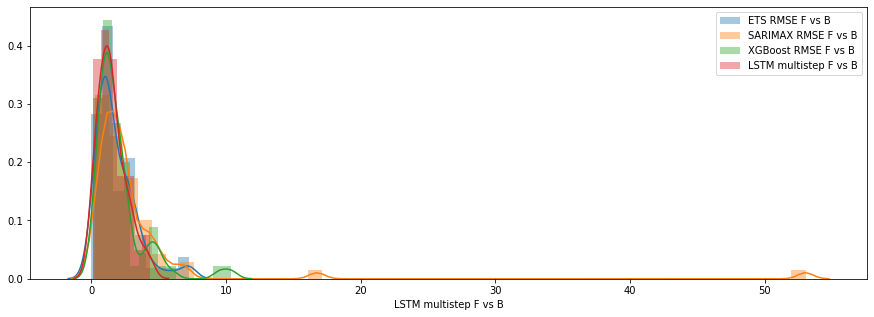

In [167]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df_rmse[col[0]],label=col[0])
ax = sns.distplot(df_rmse[col[1]],label=col[1])
ax = sns.distplot(df_rmse[col[2]],label=col[2])
ax = sns.distplot(df_rmse[col[3]],label=col[3])

plt.legend()
plt.show()

In [168]:
df_rmse.columns[1]

'SARIMAX RMSE F vs B'

In [169]:
# Creating dataframe with no SARIMAX value superior to 15
df_rmse_bis = df_rmse[df_rmse[col[1]]<15]

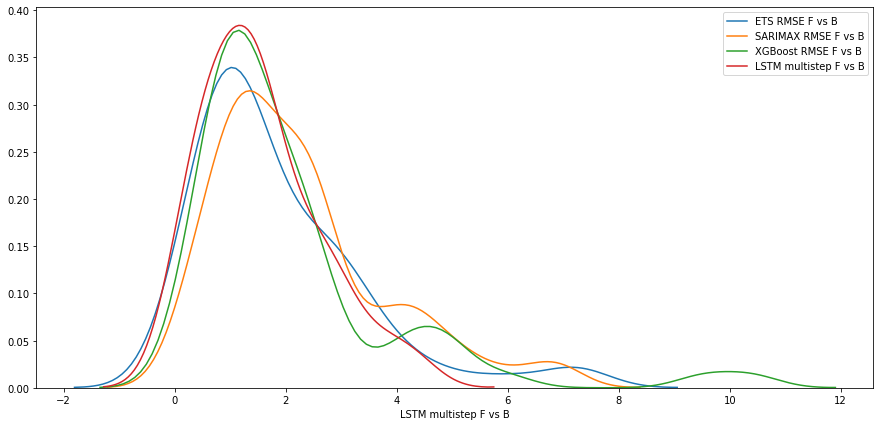

In [175]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(df_rmse_bis[col[0]],label=col[0], hist=False)
ax = sns.distplot(df_rmse_bis[col[1]],label=col[1], hist=False)
ax = sns.distplot(df_rmse_bis[col[2]],label=col[2], hist=False)
ax = sns.distplot(df_rmse_bis[col[3]],label=col[3], hist=False)

plt.legend()
plt.show()

In [176]:
df_rmse.describe()

,ETS RMSE F vs B,SARIMAX RMSE F vs B,XGBoost RMSE F vs B,LSTM multistep F vs B
count,66.000000,66.000000,66.000000,66.000000
mean,1.865455,3.240455,2.047121,1.526364
std,1.534670,6.652550,1.905143,1.033601
min,0.010000,0.270000,0.160000,0.120000
25%,0.872500,1.217500,0.955000,0.742500
50%,1.370000,1.945000,1.435000,1.340000
75%,2.572500,2.930000,2.420000,2.087500
max,7.240000,53.030000,10.400000,4.350000


In [151]:
for i in range(0, len(col)):
    print("Number of values == 0 in ", col[i],":",df_rmse[df_rmse[col[i]]>3].count()[0])

Number of values == 0 in  ETS RMSE F vs B : 11
Number of values == 0 in  SARIMAX RMSE F vs B : 17
Number of values == 0 in  XGBoost RMSE F vs B : 10
Number of values == 0 in  LSTM multistep F vs B : 5
Number of values == 0 in  LSTM multistep F vs B numero 2 : 7
